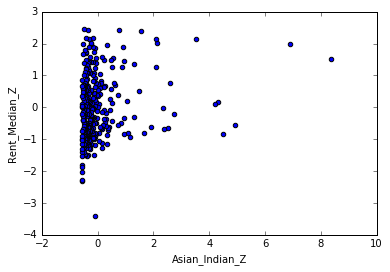

In [16]:
import requests
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import numpy as np
import matplotlib

%matplotlib inline
sourceUrl = 'http://api.census.gov/data/2014/acs1/profile?get=DP05_0040PE,DP05_0040E,DP02_0002PE,DP02_0004PE,DP02_0006PE,DP02_0007PE,\
DP02_0086PE,DP02_0092PE,DP02_0112PE,DP03_0021PE,DP03_0024PE,DP03_0028PE,\
DP03_0087E,DP03_0088E,DP04_0132E,DP05_0033PE,DP05_0056PE,NAME&for=place:*&key=a378aa61805ec039a0753ea7c31bdde4514f72e9'
response = requests.get(sourceUrl)
df = pd.DataFrame(response.json())
df = df[1:]
demo = pd.DataFrame()
demo['Asian_Indian_Percent'] = df[df[0] != 'N'][0]
demo['Asian_Indian_Total'] = df[df[0] != 'N'][1]
demo['Asian_Indian_Total'] = pd.to_numeric(demo['Asian_Indian_Total'], errors='coerce')
demo['Family_Households_Percent'] = df[df[0] != 'N'][2]
demo['Married_Couple_Family_Percent'] = df[df[0] != 'N'][3]
demo['Householder_Male_No_Wife_Percent'] = df[df[0] != 'N'][4]
demo['Householder_Male_No_Wife_Children_Under18_Percent'] = df[df[0] != 'N'][5]
demo['Total_Population'] = df[df[0] != 'N'][6]
demo['Foreign_Born_Percent'] = df[df[0] != 'N'][7]
demo['Language_NonEnglish_Percent'] = df[df[0] != 'N'][8]
demo['Commute_Public_Transport_Percent'] = df[df[0] != 'N'][9]
demo['Commute_WorkedAtHome_Percent'] = df[df[0] != 'N'][10]
demo['Occupation_Service_Percent'] = df[df[0] != 'N'][11]
demo['Income_Family_Average'] = df[df[0] != 'N'][12]
demo['Income_Family_Percapita'] = df[df[0] != 'N'][13]
demo['Income_Family_Percapita'] = pd.to_numeric(demo['Income_Family_Percapita'], errors = 'coerce')
demo['Rent_Median'] = df[df[0] != 'N'][14]
demo['Rent_Median'] = pd.to_numeric(demo['Rent_Median'], errors = 'coerce')
demo['Race_Black_Or_African_American'] = df[df[0] != 'N'][15]
demo['Race_White_And_Asian'] = df[df[0] != 'N'][16]
demo['location'] = df[df[0] != 'N'][17]
demo['city'] = demo['location'].str.split(',').str.get(0)
demo['state'] = demo['location'].str.split(',').str.get(1)
#bypercent = demo.sort_values(by = 'percent', ascending = False)[:100]
asianindiansorted = demo.sort_values(by = 'Asian_Indian_Total', ascending = False)
asianindiansorted = asianindiansorted.fillna(0)
asianindiansorted.replace(to_replace = {'Race_White_And_Asian': {'N': 0}},inplace = True)
asianindiansorted['Asian_Indian_Z'] = (asianindiansorted['Asian_Indian_Total'][1:] - \
                                       asianindiansorted['Asian_Indian_Total'][1:].mean())/asianindiansorted['Asian_Indian_Total'][1:].std(ddof = 0)

asianindiansorted['Income_Family_Percapita_Z'] = (asianindiansorted['Income_Family_Percapita'][1:] - \
                                       asianindiansorted['Income_Family_Percapita'][1:].mean())/asianindiansorted['Income_Family_Percapita'][1:].std(ddof = 0)

asianindiansorted['Rent_Median_Z'] = (asianindiansorted['Rent_Median'][1:] - \
                                       asianindiansorted['Rent_Median'][1:].mean())/asianindiansorted['Rent_Median'][1:].std(ddof = 0)
#asianindiansorted
asianindiansorted.plot.scatter(x = 'Asian_Indian_Z', y = 'Rent_Median_Z')

#asianindiansorted.ix[:,'Commute_Public_Transport_Percent':]
#sourceUrl = 'http://api.census.gov/data/2014/acs5?get=NAME,B01001_001E&for=state:*&key=a378aa61805ec039a0753ea7c31bdde4514f72e9'
#response = requests.get(sourceUrl)
#df = pd.DataFrame(response.json())
#df = df[1:]
#population = []
#for index,row in bypercent.iterrows():
    #state = np.asarray(df[df[0] == str(row['state']).strip()][1])
    #population.append(state[0] if state.size > 0 else None)

#bypercent['state population'] = population




